# About The Analysis Topic

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


# About Target Variable

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

# About Dataset

- label = Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn = mobile number of user
- aon = age on cellular network in days
- daily_decr30 = Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 = Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 = Average main account balance over last 30 days
- rental90 = Average main account balance over last 90 days
- last_rech_date_ma = Number of days till last recharge of main account
- last_rech_date_da = Number of days till last recharge of data account
- last_rech_amt_ma = Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 = Number of times main account got recharged in last 30 days
- fr_ma_rech30 = Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 = Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 = Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 = Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 = Number of times main account got recharged in last 90 days
- fr_ma_rech90 = Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 = Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 = Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 = Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 = Number of times data account got recharged in last 30 days
- fr_da_rech30 = Frequency of data account recharged in last 30 days
- cnt_da_rech90 = Number of times data account got recharged in last 90 days
- fr_da_rech90 = Frequency of data account recharged in last 90 days
- cnt_loans30 = Number of loans taken by user in last 30 days
- amnt_loans30 = Total amount of loans taken by user in last 30 days
- maxamnt_loans30 = maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 = Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 = Number of loans taken by user in last 90 days
- amnt_loans90 = Total amount of loans taken by user in last 90 days
- maxamnt_loans90 = maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 = Median of amounts of loan taken by the user in last 90 days
- payback30 = Average payback time in days over last 30 days
- payback90 = Average payback time in days over last 90 days
- pcircle = telecom circle
- pdate = date

# Importing Essential Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [5]:
df=pd.read_csv("F:\\priyanka_micro_credit\\Micro-Credit-Project\\Micro_Credit_Project\\dataset.csv")
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


# Data Pre-Processing

In [6]:
#We dont require first column as it is only index column.
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
#Structure of data
df.shape

(209593, 36)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Observation : 
    - We are having missing data.
    - The variables are of three data types int, float or object. 
   

In [9]:
#Checking the mobile no columns
df['msisdn'].nunique()

186243

In [10]:
df.msisdn.value_counts()

04581I85330    7
47819I90840    7
71742I90843    6
43430I70786    6
29191I82738    6
              ..
08630I89234    1
85156I85349    1
89402I70378    1
45426I88688    1
04116I90842    1
Name: msisdn, Length: 186243, dtype: int64

So, we can observe that there are various unique values that are present in this column so we will be removing it.

In [11]:
df.drop('msisdn', inplace=True, axis=1)

In [12]:
#Checking the telecom circle columns
df['pcircle'].nunique()

1

In [13]:
#All the entiries in the column are same so it is of no use to us.
df.drop('pcircle', inplace=True, axis=1)

In [14]:
#Checking the date columns
df['pdate'].nunique()

82

So, as we can see that all the entries in the column are not unique so we will not be removing it and we will be using label encoder in later stages.

In [15]:
#Changing object to datetime
df["pdate"]= pd.to_datetime(df["pdate"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   aon                   209593 non-null  float64       
 2   daily_decr30          209593 non-null  float64       
 3   daily_decr90          209593 non-null  float64       
 4   rental30              209593 non-null  float64       
 5   rental90              209593 non-null  float64       
 6   last_rech_date_ma     209593 non-null  float64       
 7   last_rech_date_da     209593 non-null  float64       
 8   last_rech_amt_ma      209593 non-null  int64         
 9   cnt_ma_rech30         209593 non-null  int64         
 10  fr_ma_rech30          209593 non-null  float64       
 11  sumamnt_ma_rech30     209593 non-null  float64       
 12  medianamnt_ma_rech30  209593 non-null  float64       
 13 

In [17]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observation
- Apart from 3 columns(msisdn(mobile no), pcircle(telecom circle) & pdate) every variable in dataset is numerical (ordinal, binary or continuous) in nature. So we will be treating these variables when we further progress in our analysis.
- Apart from rental30 and rental90 no other variable can be negative in nature so we will be removing those negative rows in further steps of analysis.

In [18]:
df.shape

(209593, 34)

In [19]:
#We will be removing the rows where cnt_loans90(People who haven't loans in past 90 days)<=0 because those rows are of no use to us.
df = df[df['cnt_loans90']>0]

In [20]:
print('People who have not took loan in past 90 days',df.shape)

People who have not took loan in past 90 days (207557, 34)


In [21]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate'],
      dtype='object')

In [22]:
df.shape

(207557, 34)

In [23]:
#Age on network can never be negative so we will be removing it.
df = df[df['aon']>=0]
df.shape

(206019, 34)

In [24]:
#Daily decrease on main account in 30 days of network should never be negative so we will be removing it.
df = df[df['daily_decr30']>=0]
df.shape

(204180, 34)

In [25]:
#Daily decrease on main account in 90 days of network should never be negative so we will be removing it.
df = df[df['daily_decr90']>=0]
df.shape

(204180, 34)

In [26]:
# Let's check the negative values present in our dataset

(df.drop(['pdate','label','rental30','rental90'],axis=1) >= 0).all()

aon                      True
daily_decr30             True
daily_decr90             True
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: bool

In [27]:
#Number of days till last recharge of main account of network should never be negative so we will be removing it.
df = df[df['last_rech_date_ma']>=0]
df.shape

(202891, 34)

In [28]:
#Number of days till last recharge of data account of network should never be negative so we will be removing it.
df = df[df['last_rech_date_da']>=0]
df.shape

(202879, 34)

In [29]:
#Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah) of network should never be negative so we will be removing it.
df = df[df['medianmarechprebal90']>=0]
df.shape

(201211, 34)

In [30]:
#Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah) of network should never be negative so we will be removing it.
df = df[df['medianmarechprebal30']>=0]
df.shape

(201113, 34)

In [31]:
# Let's recheck the negative values present in our dataset

(df.drop(['pdate','label','rental30','rental90'],axis=1) >= 0).all()

aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

Now we have no negative values so we will be proceeding further in our analysis.

In [32]:
# Lets split the year and month from the Date for better visulatization

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})
df['Day']=df['pdate'].dt.day

In [33]:
# Let's drop the unnecessary column
df.drop(['pdate'],axis=1,inplace=True)

In [34]:
df.head(10)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,JUL,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,AUG,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,AUG,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,JUN,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,JUN,22
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,...,0.0,3.0,18,6,0.0,11.000000,8.333333,2016,JUL,2
6,1,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,JUL,5
7,1,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,...,0.0,7.0,42,6,0.0,6.000000,3.857143,2016,AUG,5
8,1,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,...,0.0,4.0,24,6,0.0,2.666667,2.666667,2016,JUN,15
9,1,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,JUN,8


In [35]:
df['Year'].nunique

<bound method IndexOpsMixin.nunique of 0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
209588    2016
209589    2016
209590    2016
209591    2016
209592    2016
Name: Year, Length: 201113, dtype: int64>

In [36]:
#As there is no unique values in Year column so we will be removing it
df.drop(['Year'],axis=1,inplace=True)

In [37]:
#Lets check no of defalulters and non defaulters
total_customers = df.shape[0]
print("Total customers: {}".format(total_customers))
non_defaulter_customers = df[df["label"] == 1].shape[0]
print("Non defaulter customer: {}".format(non_defaulter_customers))
defaulter_customers = df[df["label"] == 0].shape[0]
print("Defaulter customer : {}".format(defaulter_customers))
non_defaulter_percent = (non_defaulter_customers/total_customers)*100
print("Non Defaulter Customer percentage : {0:.2f}%".format(non_defaulter_percent))
defaulter_percent = (defaulter_customers/total_customers)*100
print("Deafulter Customer : {0:.2f}%".format(defaulter_percent))


Total customers: 201113
Non defaulter customer: 177386
Defaulter customer : 23727
Non Defaulter Customer percentage : 88.20%
Deafulter Customer : 11.80%


# EXPLORATORY DATA ANALYSIS

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,201113.0,0.882022,0.322583,0.00,1.000,1.000000,1.000,1.000000
aon,201113.0,8142.068613,75807.284229,1.00,251.000,531.000000,983.000,999860.755168
daily_decr30,201113.0,5483.497843,9298.052819,0.00,46.800,1558.000000,7402.000,265926.000000
daily_decr90,201113.0,6194.019749,11012.610951,0.00,47.007,1597.600000,7983.640,320630.000000
rental30,201113.0,2715.516305,4298.741495,-23737.14,295.400,1101.040000,3395.700,198926.110000
rental90,201113.0,3510.308711,5754.079803,-24720.58,317.600,1362.660000,4250.790,200148.110000
last_rech_date_ma,201113.0,3787.196470,54123.037141,0.00,1.000,3.000000,7.000,998650.377733
last_rech_date_da,201113.0,3760.235473,53703.559404,0.00,0.000,0.000000,0.000,999171.809410
last_rech_amt_ma,201113.0,2077.909991,2368.889531,0.00,770.000,1539.000000,2309.000,55000.000000
cnt_ma_rech30,201113.0,4.062040,4.291637,0.00,1.000,3.000000,6.000,203.000000


Observation
- We can observe that in most of the variables the mean is varying very much from its median so there will be a high no of outliers present in it.
- Also observe that apaprt from some of the variables the standard deviation is also quite high. 

# Univariate Analysis

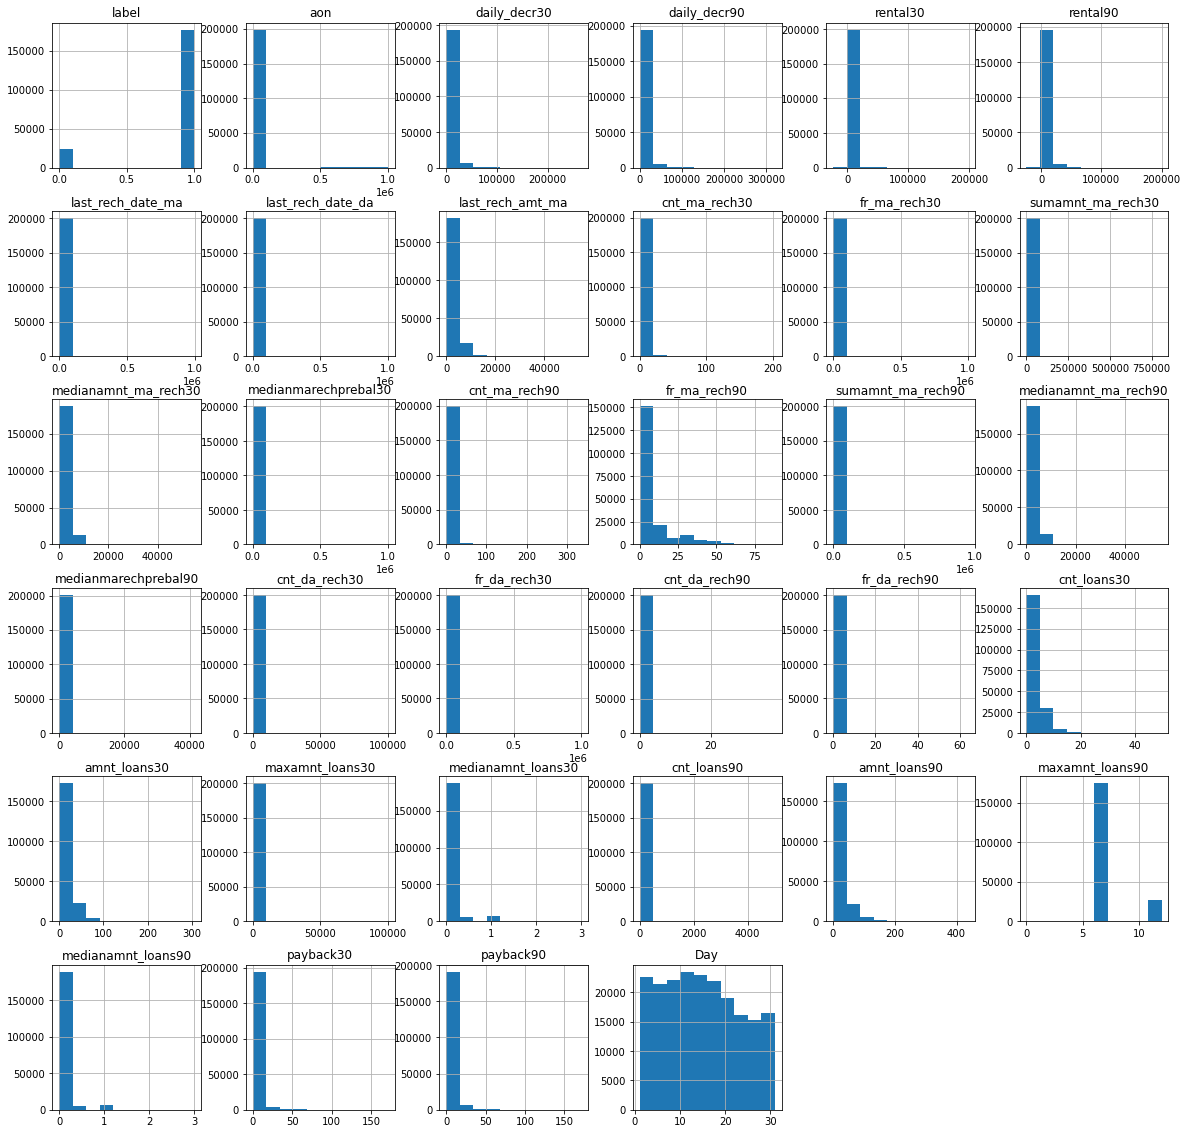

In [39]:
df.hist(figsize=(20,20))
plt.show()

By this we can observe data is not normally distributed(Mostly positively skewed).

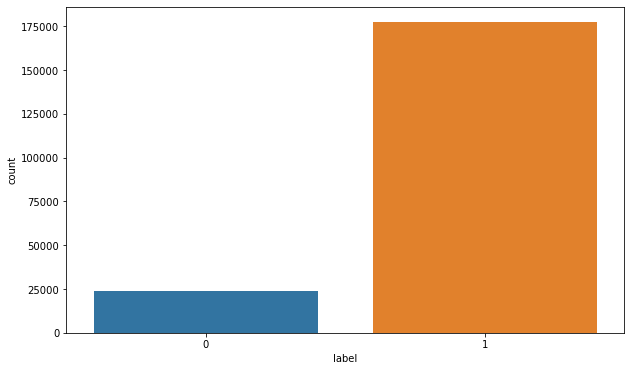

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(df["label"])
plt.show()

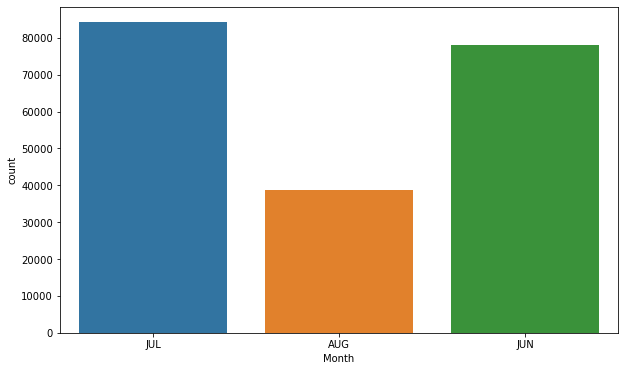

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(df["Month"])
plt.show()

Given dataset is only for 3 months (July, August, and June).

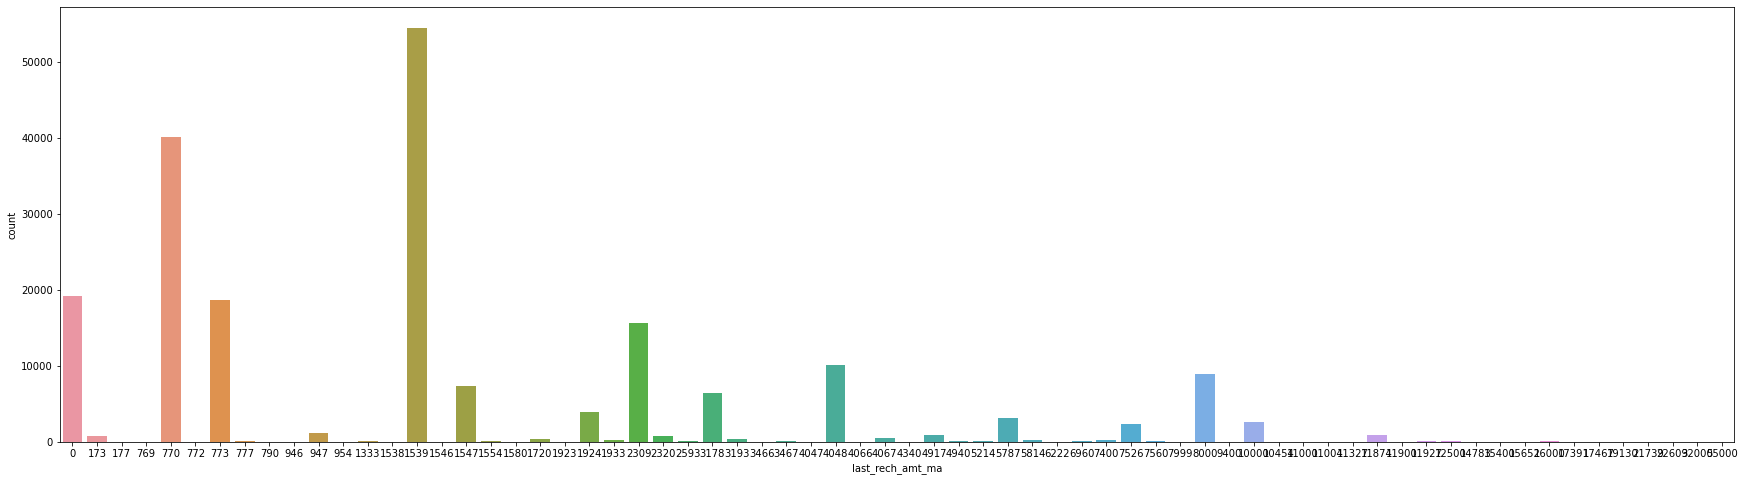

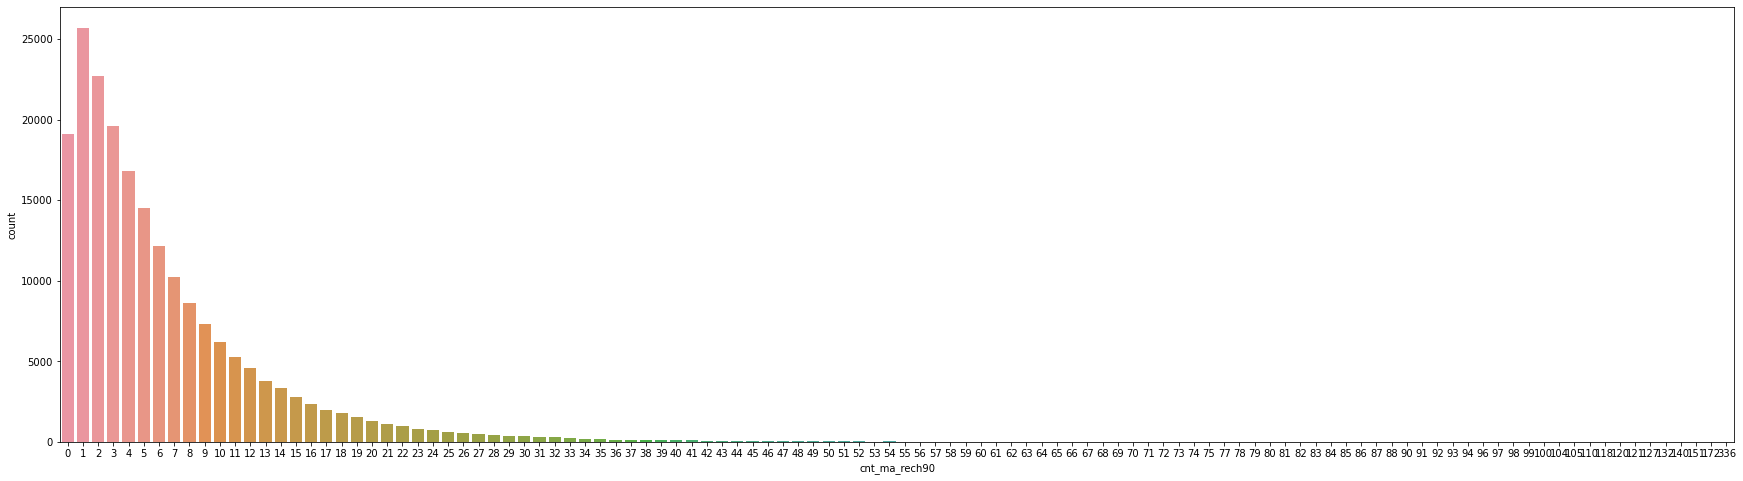

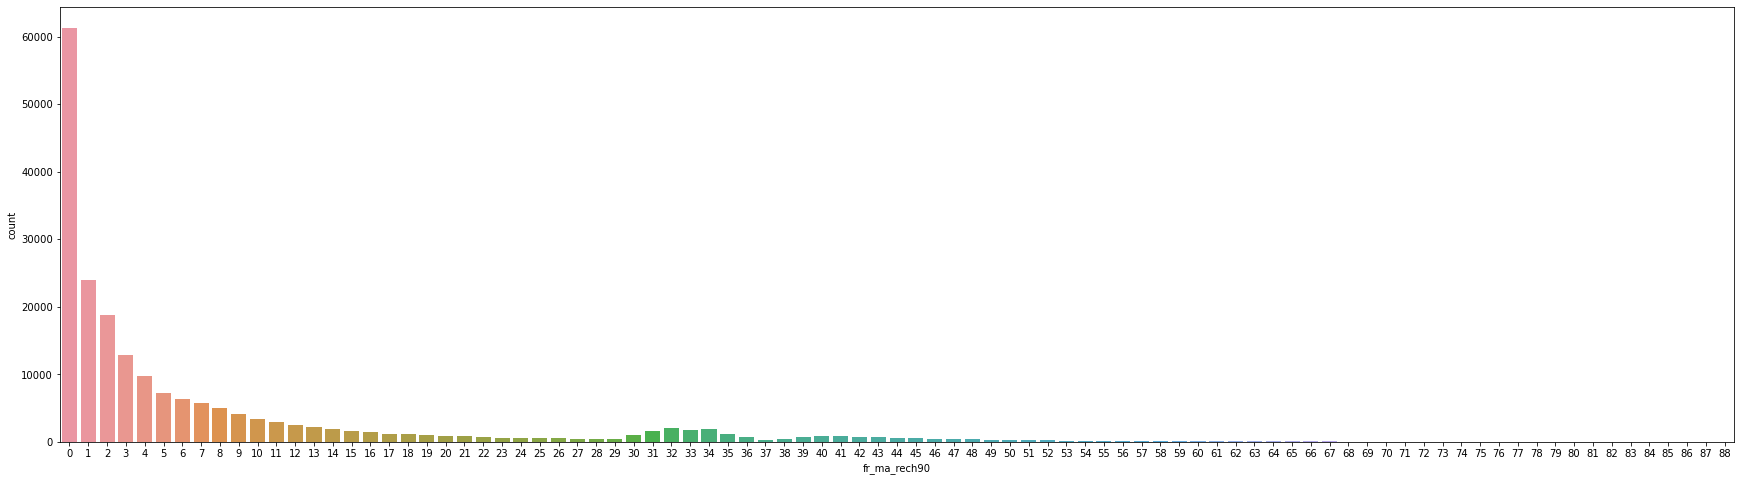

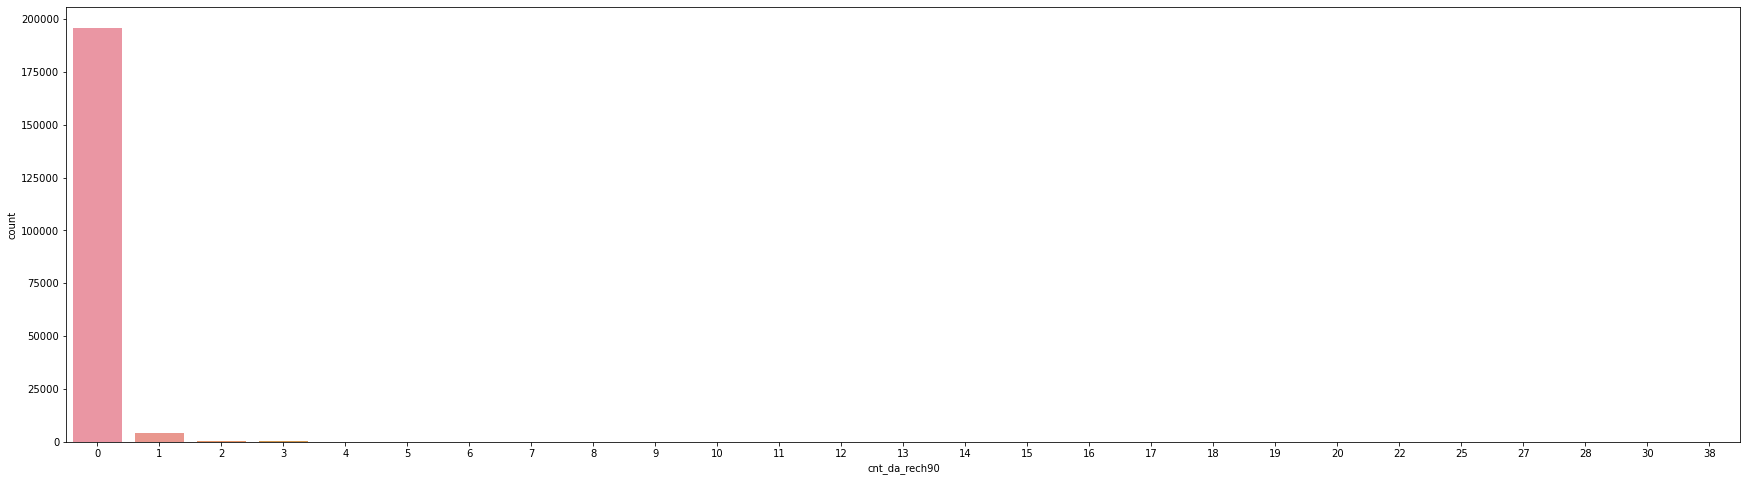

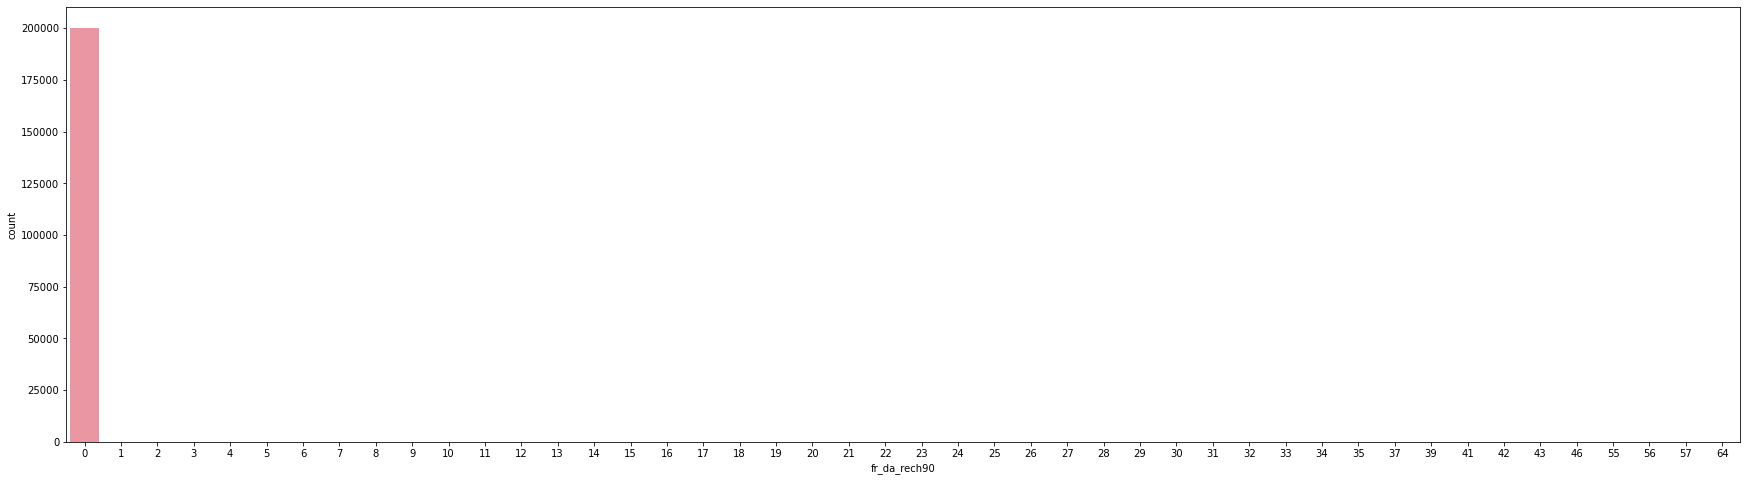

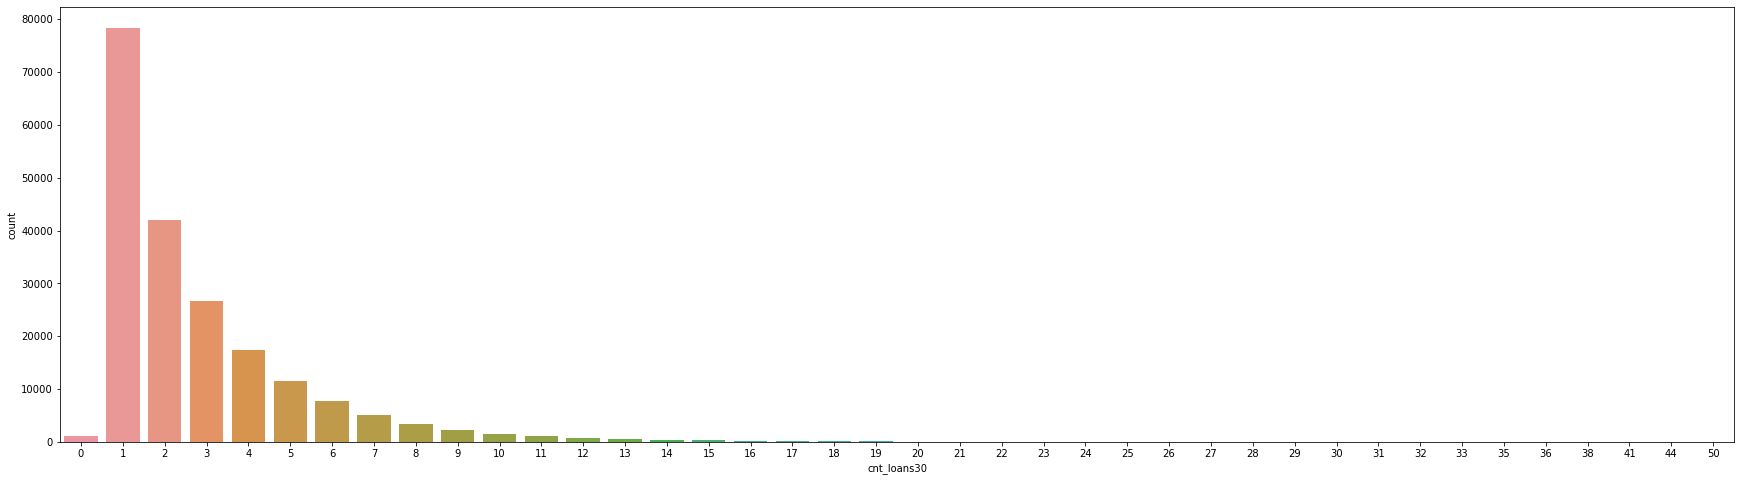

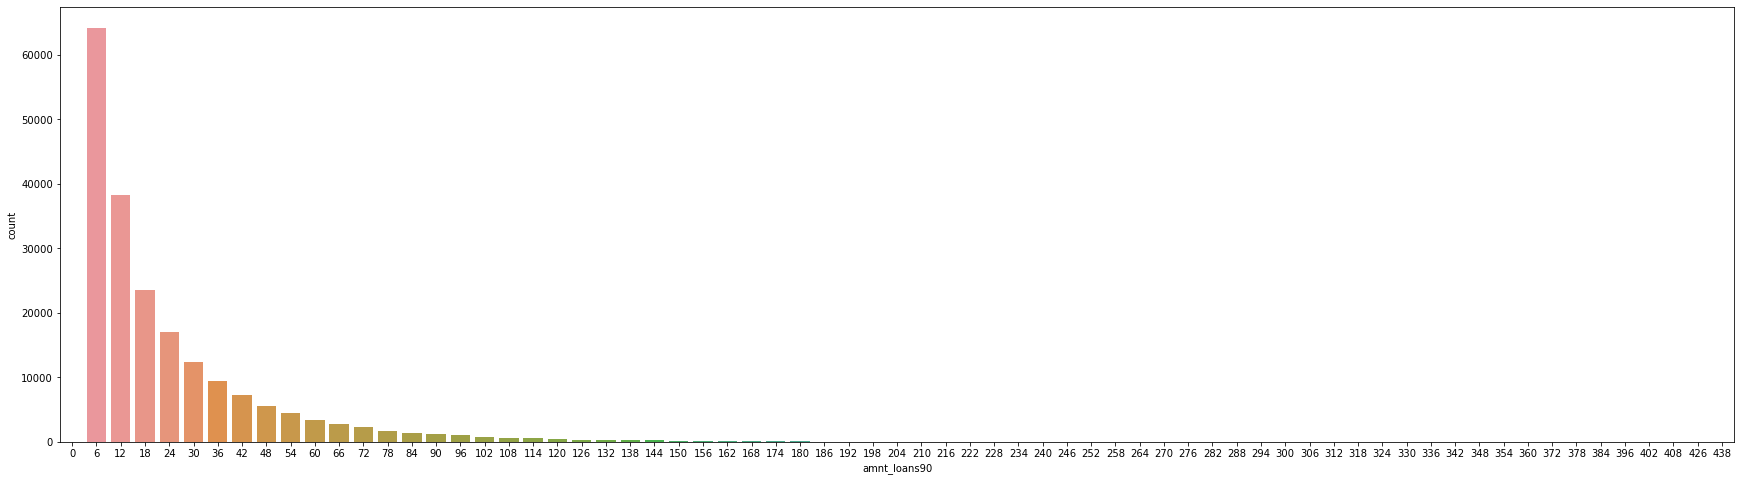

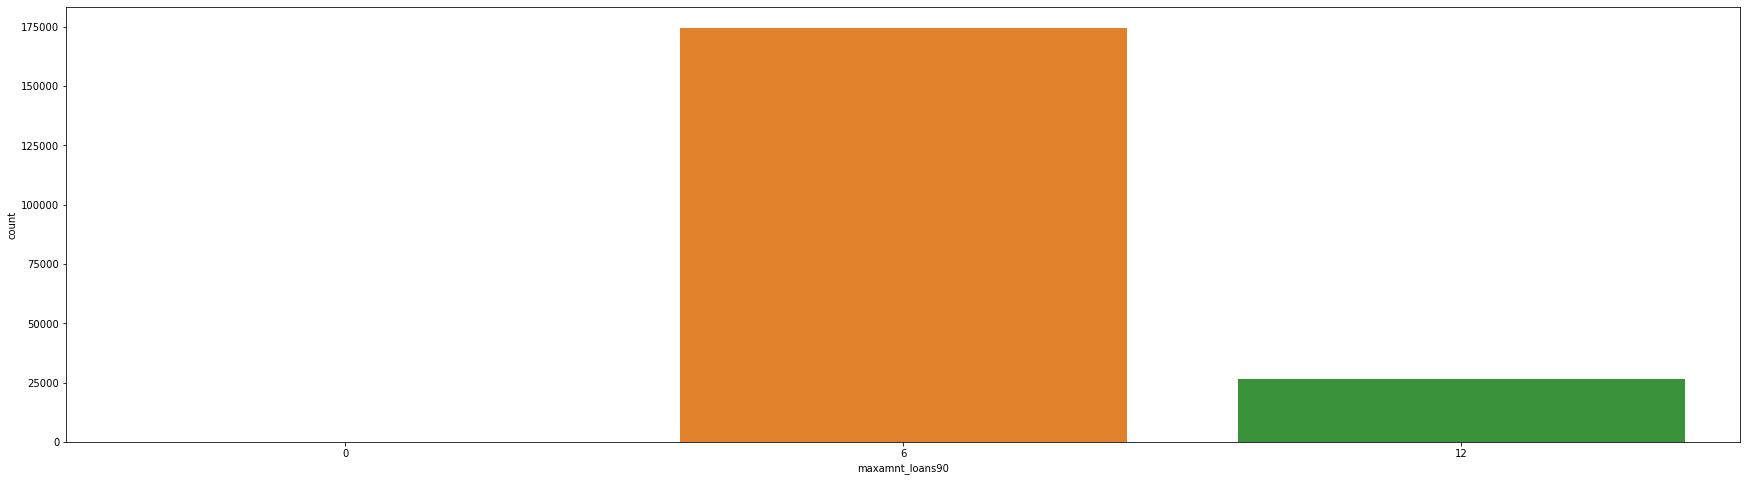

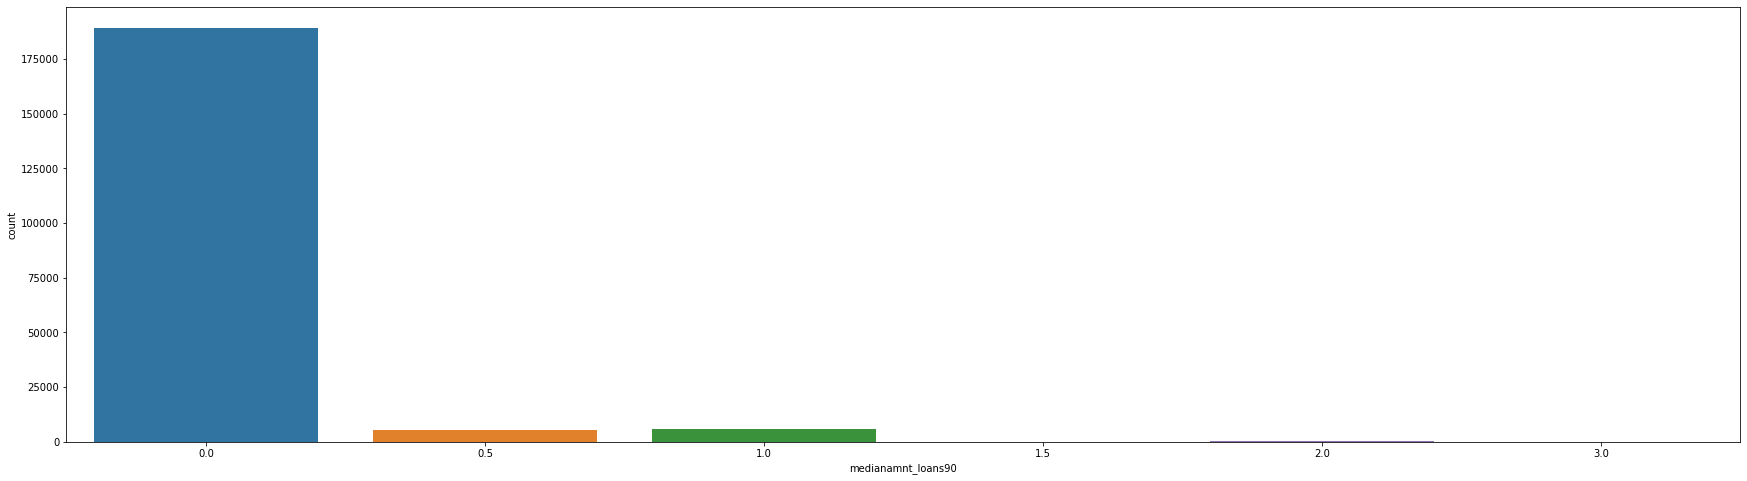

In [42]:
cols=['last_rech_amt_ma','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
      'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]
for i in cols:
    plt.subplots(figsize=(30,8))
    sns.countplot(i,data=df)
    plt.show()

# Bi-Variate Analysis

<AxesSubplot:xlabel='label', ylabel='aon'>

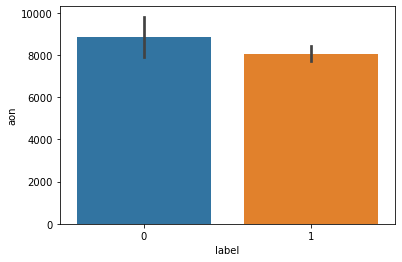

In [43]:
#Label vs aon
sns.barplot(x=df['label'],y=df['aon'])

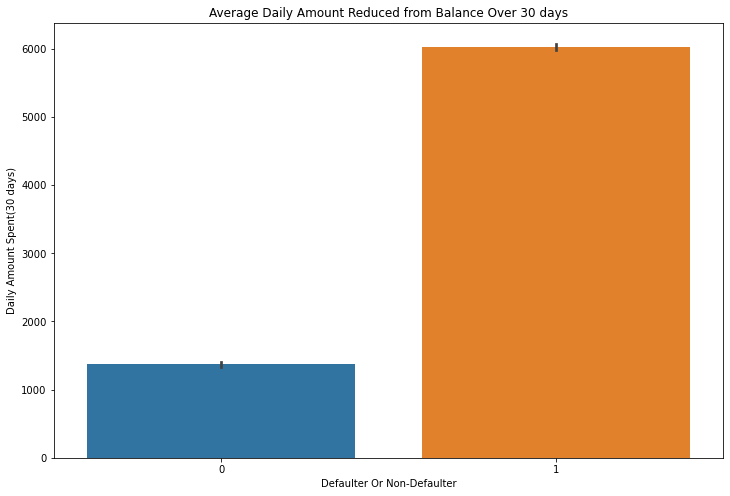

In [44]:
#Label vs Daily Amount Reduced from Balance Over 30 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='daily_decr30',data=df)
plt.title('Average Daily Amount Reduced from Balance Over 30 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("Daily Amount Spent(30 days)")
plt.xticks(rotation=0);

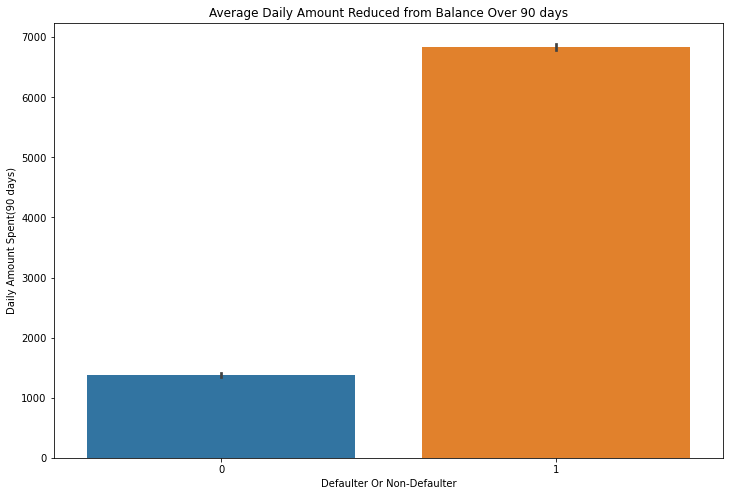

In [45]:
#Label vs Daily Amount Reduced from Balance Over 90 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='daily_decr90',data=df)
plt.title('Average Daily Amount Reduced from Balance Over 90 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("Daily Amount Spent(90 days)")
plt.xticks(rotation=0);

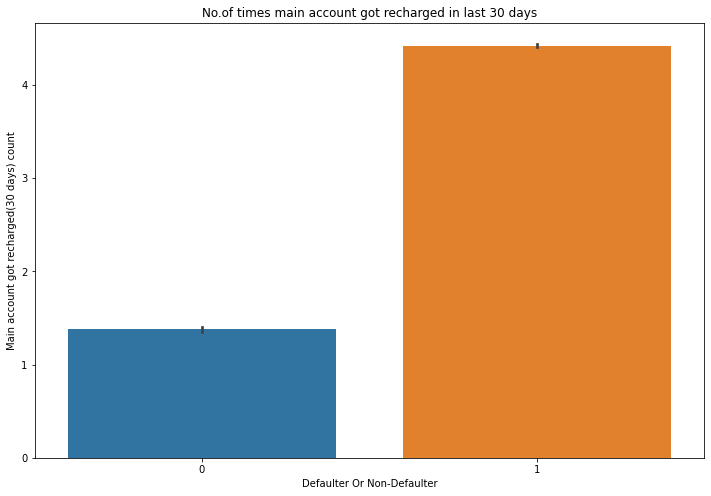

In [46]:
#Label vs Average main account balance over last 30 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='cnt_ma_rech30',data=df)
plt.title('No.of times main account got recharged in last 30 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("Main account got recharged(30 days) count")
plt.xticks(rotation=0);

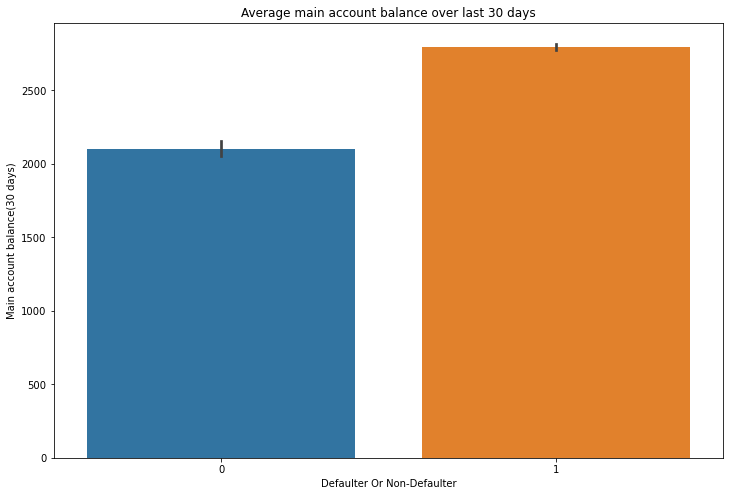

In [47]:
#Label vs Average main account balance over last 30 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='rental30',data=df)
plt.title('Average main account balance over last 30 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("Main account balance(30 days)")
plt.xticks(rotation=0);

Observation:
    - Defaulters have  max average balance of 2000,repayers has an avg main balance over 2500.

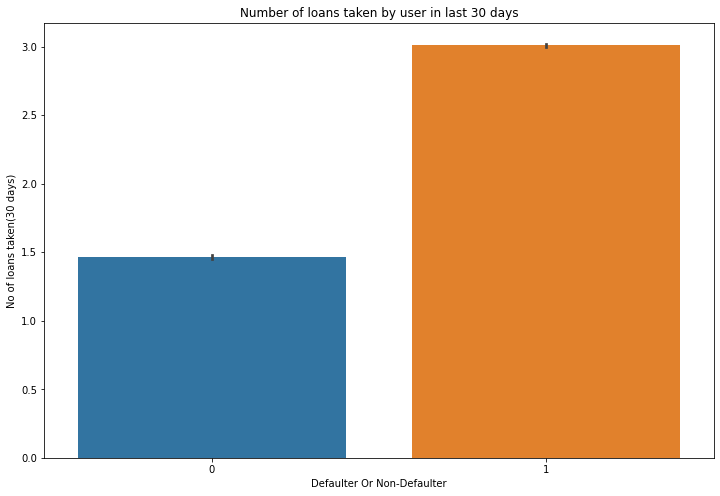

In [48]:
#Label vs No of loans taken over last 30 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='cnt_loans30',data=df)
plt.title('Number of loans taken by user in last 30 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("No of loans taken(30 days)")
plt.xticks(rotation=0);

OBSERVATION:
- Defaulters has been given a max 1 loan.
- Non-Defaulters had taken a max of 3 loans.

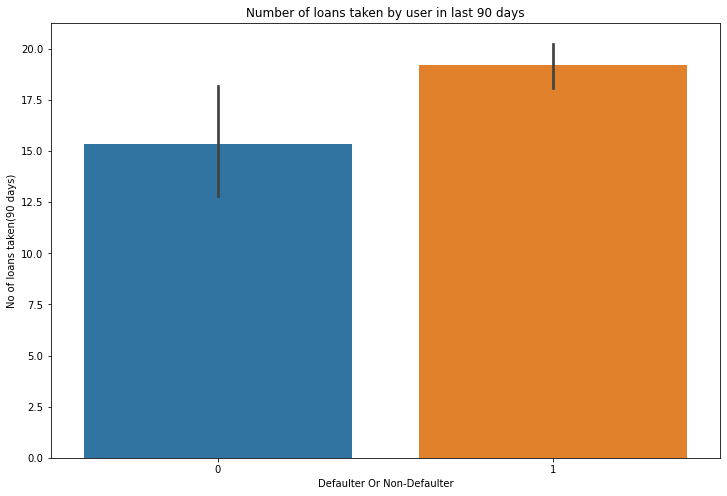

In [49]:
#Label vs No of loans taken over last 90 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='cnt_loans90',data=df)
plt.title('Number of loans taken by user in last 90 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("No of loans taken(90 days)")
plt.xticks(rotation=0);

OBSERVATION:
- Defaulters has been given a max 15 loan.
- Non-Defaulters had taken a max of 18 loans.

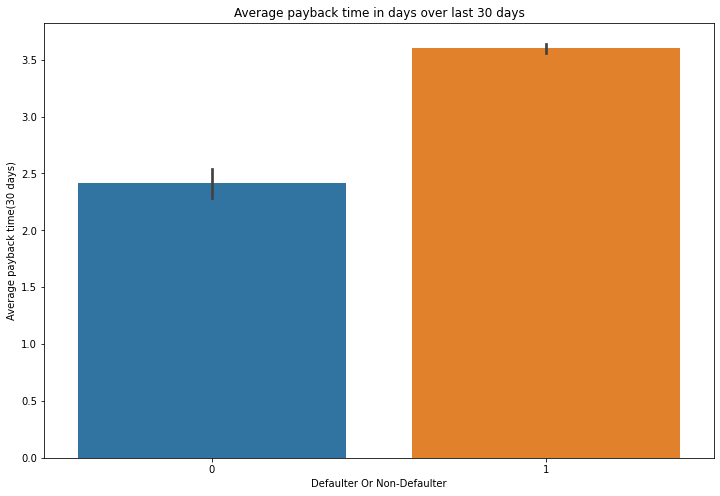

In [50]:
#Label vs Average payback time in last 30 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='payback30',data=df)
plt.title('Average payback time in days over last 30 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("Average payback time(30 days)")
plt.xticks(rotation=0);

OBSERVATION:
- For Defaulters the average payback time in last 30 days is 2.5.
- For Non-Defaulters the average payback time in last 30 days is 3.5.

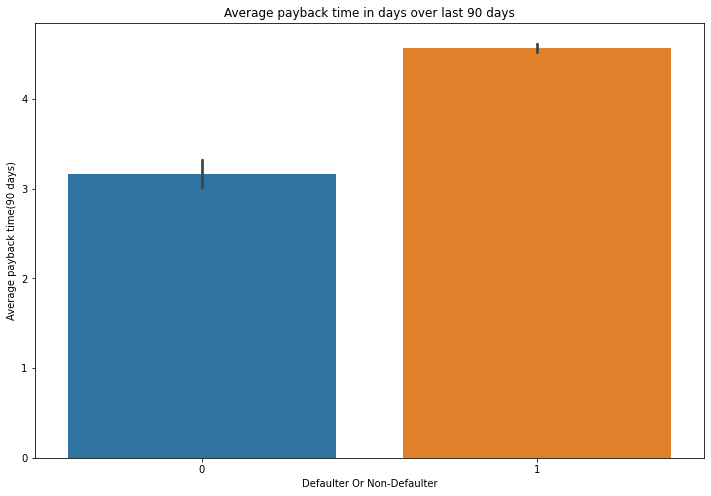

In [51]:
#Label vs Average payback time in last 90 days
plt.subplots(figsize=(12,8))
sns.barplot(x='label',y='payback90',data=df)
plt.title('Average payback time in days over last 90 days')
plt.xlabel("Defaulter Or Non-Defaulter")
plt.ylabel("Average payback time(90 days)")
plt.xticks(rotation=0);

OBSERVATION:
- For Defaulters the average payback time in last 90 days is 3.
- For Non-Defaulters the average payback time in last 90 days is 4.5.

In [52]:
corr = df.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day
label,1.000000,-0.003370,0.161796,0.159971,0.052243,0.069243,0.003233,0.000831,0.120862,0.228614,...,0.194437,0.000576,0.042877,0.005463,0.196682,0.096487,0.034144,0.043669,0.044212,0.014862
aon,-0.003370,1.000000,0.000855,0.000167,-0.000708,-0.000692,0.001959,-0.001577,0.002980,-0.002845,...,-0.001930,-0.002623,0.005410,-0.000878,-0.002488,-0.000646,0.003515,0.002547,0.002811,0.000312
daily_decr30,0.161796,0.000855,1.000000,0.977525,0.445937,0.463260,-0.000572,-0.001877,0.272728,0.447969,...,0.475423,0.000458,-0.011477,0.009147,0.567837,0.432760,-0.037145,0.024834,0.044771,0.006408
daily_decr90,0.159971,0.000167,0.977525,1.000000,0.438455,0.476267,-0.000109,-0.002156,0.260752,0.423311,...,0.451914,0.000494,-0.005240,0.009659,0.572128,0.430708,-0.034397,0.017529,0.038700,-0.021716
rental30,0.052243,-0.000708,0.445937,0.438455,1.000000,0.955377,-0.001436,0.003400,0.124212,0.234643,...,0.239334,-0.000894,-0.016456,0.004512,0.305768,0.263150,-0.035929,0.073041,0.095400,0.036230
rental90,0.069243,-0.000692,0.463260,0.476267,0.955377,1.000000,-0.002298,0.003004,0.117856,0.231680,...,0.238835,-0.001419,-0.008899,0.005768,0.335977,0.285567,-0.034129,0.067325,0.100304,0.009087
last_rech_date_ma,0.003233,0.001959,-0.000572,-0.000109,-0.001436,-0.002298,1.000000,0.001946,-0.000279,0.003593,...,0.000712,0.001122,0.001683,-0.000121,0.000631,-0.000748,0.002650,-0.002434,-0.001921,0.000560
last_rech_date_da,0.000831,-0.001577,-0.001877,-0.002156,0.003400,0.003004,0.001946,1.000000,0.000190,0.001439,...,0.000010,0.000071,-0.001047,-0.000918,-0.000162,0.000767,-0.003488,-0.000082,0.000340,0.000848
last_rech_amt_ma,0.120862,0.002980,0.272728,0.260752,0.124212,0.117856,-0.000279,0.000190,1.000000,-0.007999,...,0.005850,0.000861,0.028889,0.000279,0.011333,0.167260,0.021593,-0.030603,-0.017459,0.031670
cnt_ma_rech30,0.228614,-0.002845,0.447969,0.423311,0.234643,0.231680,0.003593,0.001439,-0.007999,1.000000,...,0.753162,0.000502,-0.070087,0.014250,0.684385,0.168919,-0.074042,0.038255,0.010526,0.069086


<AxesSubplot:>

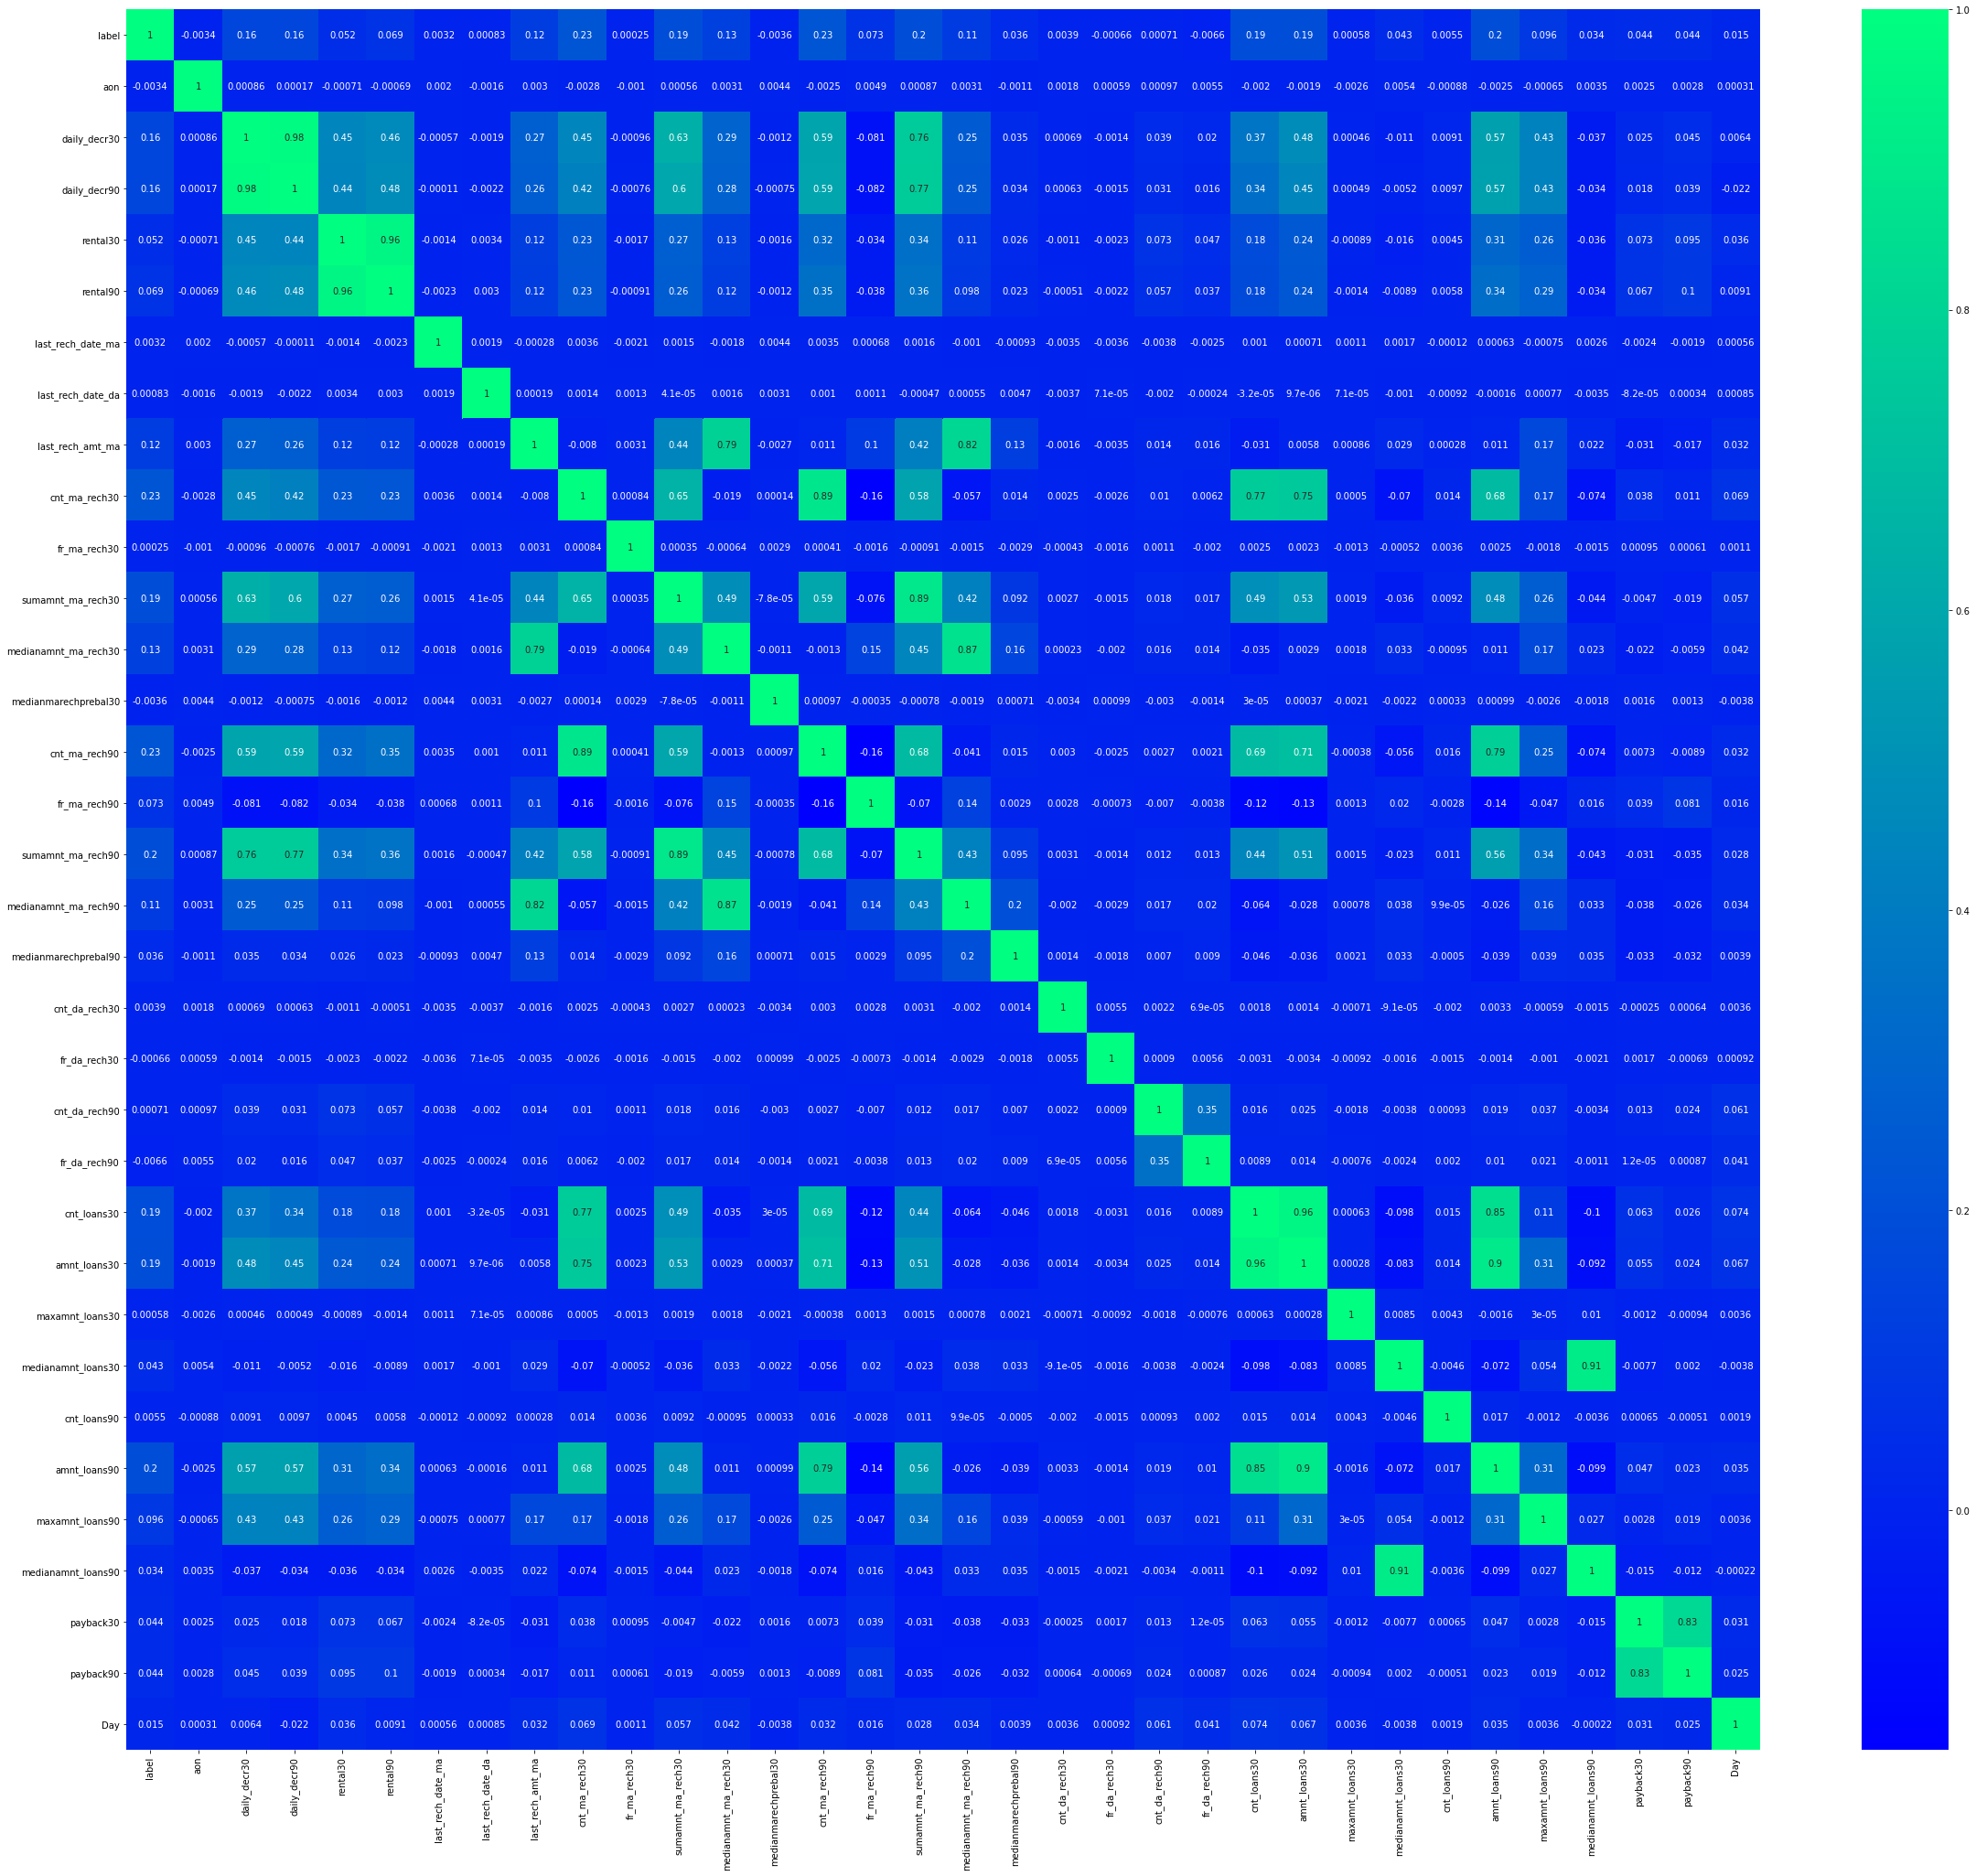

In [53]:
plt.figure(figsize=(40,35))
sns.heatmap(corr,annot=True,cmap="winter")

Highly Correlated
- daily_decr30
- daily_decr90
- cnt_loan30
- amnt_loan30

Least Correlated
- aon
- maxamnt_loans30
- last_rech_date_da
- cnt_loans90

In [54]:
df.shape

(201113, 35)

In [55]:
#We will be dropping the columns that are highly and less correlated with each other inorder to avoid multicolinearity problem

df.drop(columns=["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"],axis=1, inplace = True)

In [56]:
df.shape

(201113, 25)

# Plotting Outliers

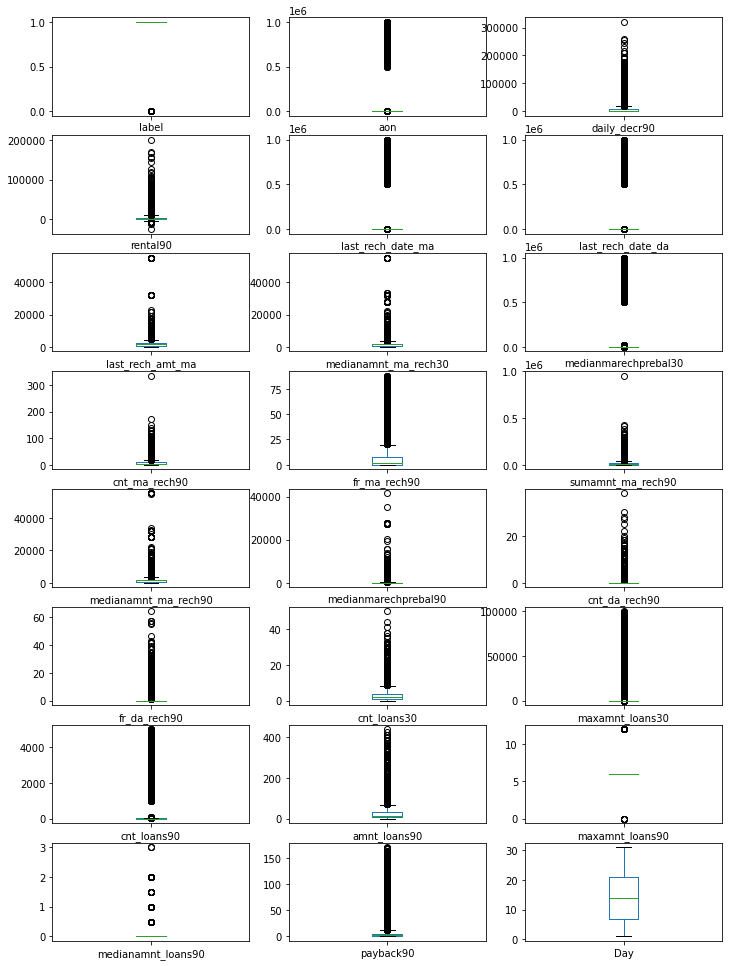

In [57]:
df.plot(kind='box',subplots=True,layout=(14,3),figsize=(12,30))
plt.show()

Observation:
- We can observe from the data that we have a lot of outliers present in the datasets if we ought to remove it we will be removing a significant amount of our data.
- So as a final verdict we will not be removing any of the outliers present in it.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201113 entries, 0 to 209592
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 201113 non-null  int64  
 1   aon                   201113 non-null  float64
 2   daily_decr90          201113 non-null  float64
 3   rental90              201113 non-null  float64
 4   last_rech_date_ma     201113 non-null  float64
 5   last_rech_date_da     201113 non-null  float64
 6   last_rech_amt_ma      201113 non-null  int64  
 7   medianamnt_ma_rech30  201113 non-null  float64
 8   medianmarechprebal30  201113 non-null  float64
 9   cnt_ma_rech90         201113 non-null  int64  
 10  fr_ma_rech90          201113 non-null  int64  
 11  sumamnt_ma_rech90     201113 non-null  int64  
 12  medianamnt_ma_rech90  201113 non-null  float64
 13  medianmarechprebal90  201113 non-null  float64
 14  cnt_da_rech90         201113 non-null  int64  
 15  

As month is categorical data we will be changing it to numerical using Label Encoder.

# Encoding

In [59]:
#Let's encode our dataset

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

# Checking and Treating Skewness

In [60]:
df.skew()

label                   -2.368537
aon                      1.783460
daily_decr90             0.222354
rental90                 0.446828
last_rech_date_ma       16.479224
last_rech_date_da       16.763513
last_rech_amt_ma         1.067642
medianamnt_ma_rech30     2.018000
medianmarechprebal30     0.835978
cnt_ma_rech90            2.870697
fr_ma_rech90             2.279040
sumamnt_ma_rech90        1.699802
medianamnt_ma_rech90     2.084383
medianmarechprebal90     0.764172
cnt_da_rech90           23.286798
fr_da_rech90            26.378383
cnt_loans30              2.674430
maxamnt_loans30         18.308972
cnt_loans90             17.528338
amnt_loans90             3.111810
maxamnt_loans90          2.178927
medianamnt_loans90       4.872946
payback90                0.840465
Month                   -0.326501
Day                      0.179758
dtype: float64

In [61]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [62]:
#Splitting dataset into Independent and Target variable
df_x=df.drop(columns="label")
y=pd.DataFrame(df["label"])

In [63]:
df_x.shape, y.shape

((201113, 24), (201113, 1))

# Scaling The Data

In [64]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [65]:
x.describe()

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,Month,Day
count,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,...,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05,2.011130e+05
mean,-1.707193e-16,9.048009e-17,-1.531578e-17,-4.985082e-16,5.703133e-15,-7.940038e-16,2.921326e-16,5.454591e-17,7.222492e-16,5.133183e-16,...,2.359196e-15,4.997883e-16,-3.487454e-17,1.079633e-15,5.128037e-16,4.097850e-15,-2.152115e-15,-3.915693e-16,4.352295e-16,-8.789075e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-5.783258e+00,-1.466432e+00,-1.327013e+00,-1.522242e+00,-1.722186e-01,-2.276428e+00,-2.029653e+00,-2.359686e+00,-1.841036e+00,-1.110222e+00,...,-6.136531e-02,-2.260166e+00,-1.919733e+00,-1.030971e+00,-2.103160e+00,-5.445059e+00,-2.420999e-01,-1.094321e+00,-1.622994e+00,-1.599606e+00
25%,-6.588064e-01,-9.119585e-01,-9.257321e-01,-8.193967e-01,-1.722186e-01,-7.333257e-01,-6.108815e-01,5.924413e-02,-6.008396e-01,-1.110222e+00,...,-6.136531e-02,-9.391695e-01,-1.857640e-01,-1.030971e+00,-1.041020e+00,-3.886938e-01,-2.420999e-01,-1.094321e+00,-2.657603e-01,-8.863374e-01
50%,1.532097e-01,-8.926675e-02,-2.039269e-01,-1.165514e-01,-1.722186e-01,3.200057e-01,4.217306e-01,3.806407e-01,-2.418125e-02,-2.174751e-01,...,-6.136531e-02,-1.664362e-01,-1.857640e-01,-2.871870e-01,-4.197074e-01,-3.886938e-01,-2.420999e-01,5.795441e-01,-2.657603e-01,-5.419039e-02
75%,7.795934e-01,8.340889e-01,8.281583e-01,5.862939e-01,-1.722186e-01,7.706375e-01,6.521666e-01,5.880143e-01,7.582954e-01,6.752718e-01,...,-6.136531e-02,8.070926e-01,-1.857640e-01,6.960416e-01,6.424329e-01,-3.886938e-01,-2.420999e-01,9.648297e-01,1.091473e+00,7.779566e-01
max,2.252399e+00,1.911805e+00,2.032711e+00,5.598886e+00,9.783386e+00,1.769166e+00,1.647367e+00,8.533302e-01,3.465220e+00,2.537303e+00,...,2.521091e+01,4.770081e+00,1.537311e+01,6.456023e+00,4.384950e+00,2.569090e+00,7.761663e+00,1.252852e+00,1.091473e+00,1.966738e+00


# Model Building

In [66]:
#Coverting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [67]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [68]:
models= [LogisticRegression(),DecisionTreeClassifier(),GaussianNB()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Accuracy Score : ",accuracy_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LogisticRegression()  : 0.8868295108459195
Scores
Accuracy Score :  0.8888695522462273
--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  : 0.9999813537199329
Scores
Accuracy Score :  0.8858364617258783
--------------------------------------------------------------------------------------------


Score of  GaussianNB()  : 0.7957113555845609
Scores
Accuracy Score :  0.7967332123411979
--------------------------------------------------------------------------------------------




In [69]:
#Cross Validation
from sklearn.model_selection import cross_val_score
models= [LogisticRegression(),DecisionTreeClassifier(),GaussianNB()]
rocscore=[]
for m in models:
    score=cross_val_score(m,x,y,cv=2,scoring="accuracy")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,predm)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,predm))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,predm))
    print('\n')
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LogisticRegression()  is : [0.88679058 0.88717729]
Mean Score :  0.8869839353664799
Standard Deviation :  0.00019335887752341963
roc auc score :  0.7338137348233023


Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.65      0.42      4633
           1       0.95      0.82      0.88     35590

    accuracy                           0.80     40223
   macro avg       0.63      0.73      0.65     40223
weighted avg       0.87      0.80      0.82     40223



Confusion Matrix:
 [[ 3021  1612]
 [ 6564 29026]]


--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  is : [0.88289229 0.88339831]
Mean Score :  0.8831452976834304
Standard Deviation :  0.0002530077384240714
roc auc score :  0.7338137348233023


Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.65      0.42      4633
          

# We are getting the best score using LogisticRegression after Cross-Validation.

We will take a look at Ensemble Methods to boost our scores.

# Ensemble Methods

In [70]:
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
emodels= [GradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier()]
for m in emodels:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Accuracy Score : ",accuracy_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  GradientBoostingClassifier()  : 0.921343775250171
Scores
Accuracy Score :  0.9219849339929891
--------------------------------------------------------------------------------------------


Score of  AdaBoostClassifier()  : 0.9115109702281061
Scores
Accuracy Score :  0.914228177908162
--------------------------------------------------------------------------------------------


Score of  ExtraTreesClassifier()  : 0.9999813537199329
Scores
Accuracy Score :  0.9186535067001467
--------------------------------------------------------------------------------------------




# Now we can observe that using ExtraTreeClassifier we have boosted up our score by 99%.

In [71]:
#Cross Validation
from sklearn.model_selection import cross_val_score
emodels= [GradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier()]
rocscore=[]
for m in emodels:
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,predm)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,predm))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,predm))
    print('\n')
    print("--------------------------------------------------------------------------------------------")
    print("\n")

roc auc score :  0.7129673408941208


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.45      0.56      4633
           1       0.93      0.98      0.96     35590

    accuracy                           0.92     40223
   macro avg       0.84      0.71      0.76     40223
weighted avg       0.91      0.92      0.91     40223



Confusion Matrix:
 [[ 2065  2568]
 [  704 34886]]


--------------------------------------------------------------------------------------------


roc auc score :  0.7129673408941208


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.45      0.56      4633
           1       0.93      0.98      0.96     35590

    accuracy                           0.92     40223
   macro avg       0.84      0.71      0.76     40223
weighted avg       0.91      0.92      0.91     40223



Confusion Matrix:
 [[ 2065  2568]
 [  704 34886]]


-------------------

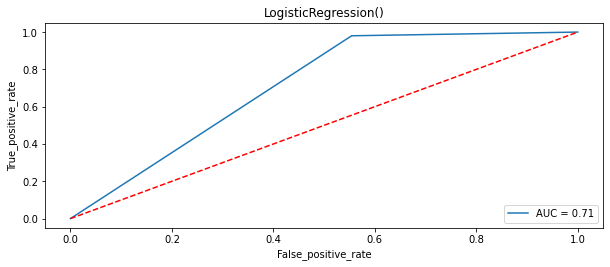

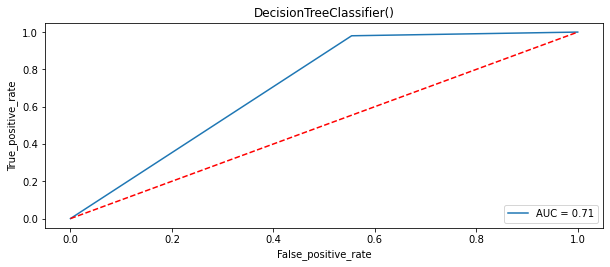

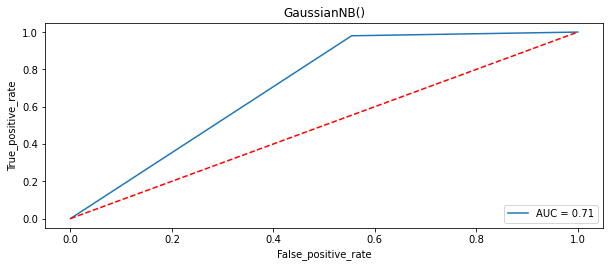

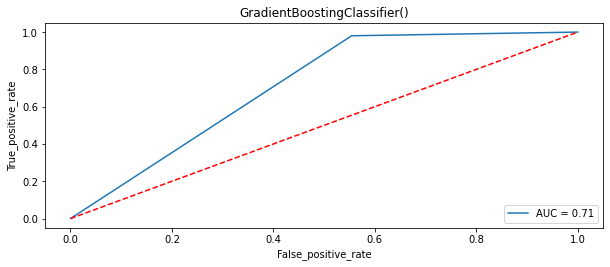

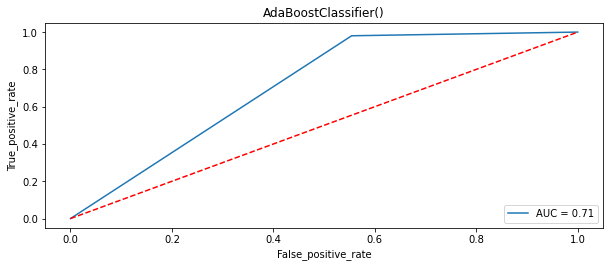

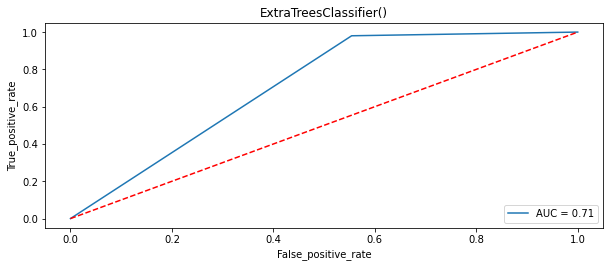

In [72]:
emodels= [LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier()]
for name in emodels:
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,predm)
    roc_auc=auc(false_positive_rate, true_positive_rate)    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [73]:
#Extra Trees Classifier is the best model so we will find out it's best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
et=ExtraTreesClassifier()
parameters = {'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
GridSearchCV(et,parameters)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6],
                         'n_estimators': [50, 100, 200, 300]})

In [74]:
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=2,verbose=1,refit=True,n_jobs=-1)
    clf.fit(x,y)
    print(clf.best_params_)
    print(clf.best_score_)

As it was taking a lot of time in order to find the best parameters we take randoml take the paramters
- {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}

In [75]:
#Using ExtraTreeClassifier method with best parameters
etc=ExtraTreesClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'log2',min_samples_split=4)
etc.fit(x_train,y_train)
print("Score of ",etc," :",etc.score(x_train,y_train))
predetc=etc.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predetc))
print("Classification Report : \n",classification_report(y_test,predetc))
print("Confusion_matrix : ",confusion_matrix(y_test,predetc))
print("--------------------------------------------------------------------------------------------")
print("\n")

Score of  ExtraTreesClassifier(max_features='log2', min_samples_split=4, n_estimators=300)  : 0.9996457206787246
Scores
Accuracy Score :  0.9202446361534445
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.44      0.56      4633
           1       0.93      0.98      0.96     35590

    accuracy                           0.92     40223
   macro avg       0.85      0.71      0.76     40223
weighted avg       0.91      0.92      0.91     40223

Confusion_matrix :  [[ 2046  2587]
 [  621 34969]]
--------------------------------------------------------------------------------------------




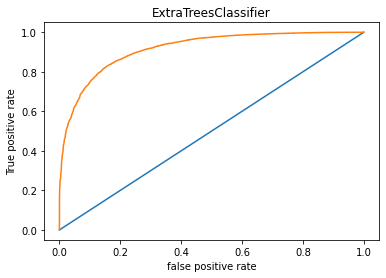

roc_auc_score =  0.9165082737440647


In [76]:
y_probs = etc.predict_proba(x_test)
y_probs = y_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('ExtraTreesClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

# Saving the Model

In [77]:
import pickle
filename= "MicroCredit.pkl"
pickle.dump(etc,open(filename,'wb'))